#Performing Exploratory Data Analysis on Titanic Dataset

##Importing The Libraries

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

##Importing The Dataset

In [122]:
train= pd.read_csv('titanic_train.csv')

##Showing The Top 5 Data From The Data Set

In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Starting With EDA

Starting with checking the null values in the dataset


In [124]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False




> true = Null


> False = Values Present


##Now we will visually represent the column that has the null values using heatmap from seaborn





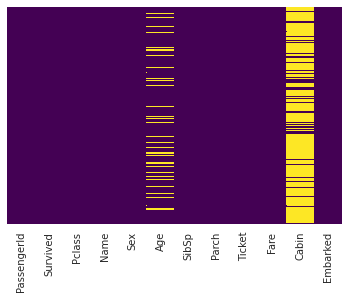

In [125]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

Now we will study our dataset and try to get more information using visualisation techniques

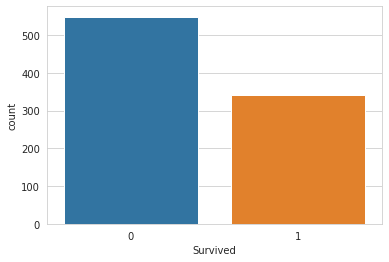

In [126]:
sns.countplot(x= 'Survived', data= train)

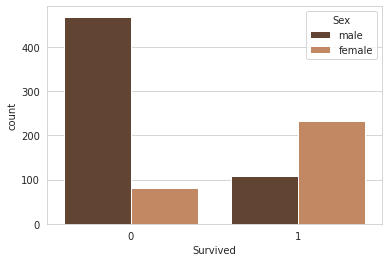

In [127]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='copper')

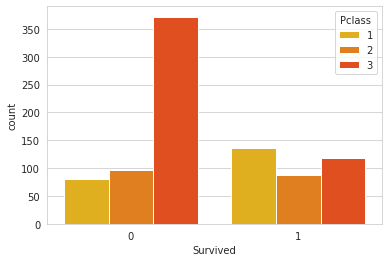

In [128]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue= 'Pclass', data= train, palette= 'autumn_r' )

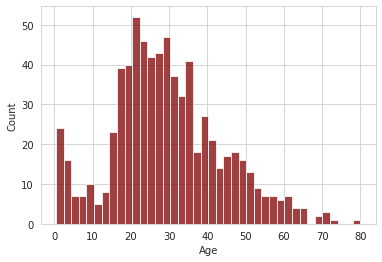

In [129]:
sns.histplot(train['Age'].dropna(), kde=False, bins= 40, color='maroon')

There is positive relation between the age and passenger class 

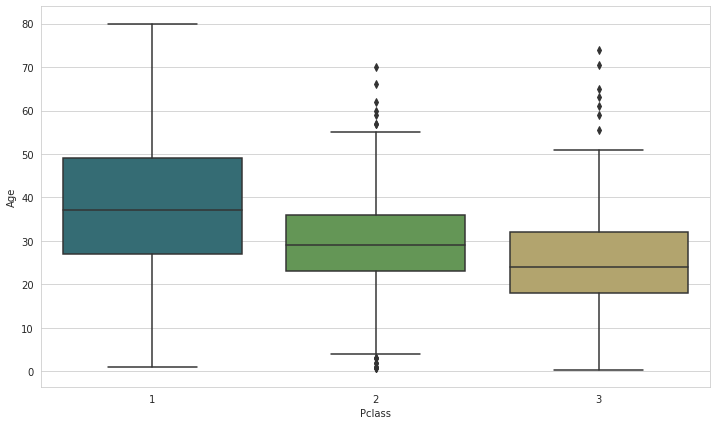

In [130]:
plt.figure(figsize= (12,7))
sns.boxplot(x= 'Pclass', y= 'Age', data= train, palette='gist_earth')

In [131]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37

    elif Pclass == 2:
        return 29

    else:
          return 23

  else:
    return Age 

In [132]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

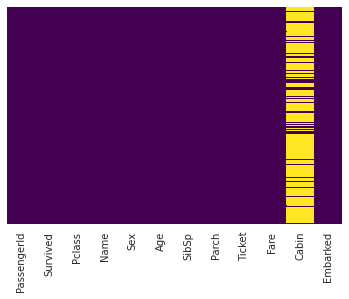

In [133]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [134]:
train.drop('Cabin', axis= 1, inplace= True)

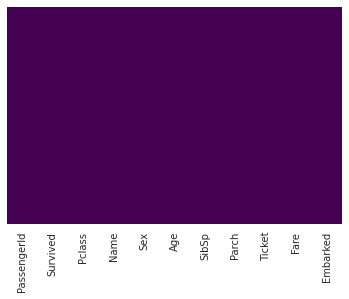

In [135]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [136]:
train.dropna(inplace=True)

###Coverting The Categorical Features 

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [138]:
pd.get_dummies(train['Embarked'], drop_first= True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [139]:
sex = pd.get_dummies(train['Sex'], drop_first= True)
embark = pd.get_dummies(train['Embarked'], drop_first= True)

In [140]:
train.drop(['Name', 'Sex','Embarked','Ticket'], axis=1, inplace=True)

In [141]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [149]:
train= pd.concat([train,sex, embark], axis= 1)

In [150]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


We have sucessfully removed all the null values and cleaned the dataset. Now we will apply logistic regression to out dataset

In [151]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [152]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [156]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
predict = lr.predict(X_test)

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)

In [160]:
cm

array([[146,  17],
       [ 35,  69]])

In [162]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, predict)
ac

0.8052434456928839

In [163]:
predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1])

In [165]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, predict)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       163
           1       0.80      0.66      0.73       104

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267

